# Goal

The goal of the file is to analyse the market of game on steam. Target Variables of this project are:
* coppies sold
* amount of people playing the game
* reviews
  
The analysis will be based on the features such as:
* core features(owners, players, reviews)
* tags
* genres
* languages
* price

The dataset consists top 10000 games on steam by the amount of owners. All the data was gathered by SteamSpy API on the November 10th. 

# Innitialization and first look

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("../data/processed_game_data.csv")

In [2]:
df.head()

,appid,name,developer,publisher,positive,negative,owners,average_forever,average_2weeks,median_forever,...,Audio Production,Software Training,Web Publishing,Nudity,Violent,Free to Play,Movie,Gore,Sexual Content,Accounting
0,730.0,Counter-Strike: Global Offensive,Valve,Valve,7642084.0,1173003.0,"100,000,000 .. 200,000,000",33930.0,730.0,6497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1172470.0,Apex Legends,Respawn,Electronic Arts,668053.0,326926.0,"100,000,000 .. 200,000,000",10226.0,703.0,939.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,578080.0,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",1520457.0,1037487.0,"100,000,000 .. 200,000,000",23556.0,892.0,5987.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1623730.0,Palworld,Pocketpair,Pocketpair,358266.0,22443.0,"50,000,000 .. 100,000,000",3715.0,698.0,2111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,440.0,Team Fortress 2,Valve,Valve,1044264.0,117208.0,"50,000,000 .. 100,000,000",22688.0,589.0,4705.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The way dataset is structered:
* Values from 0 to 19 are core game informations(where 18th and 19th are game tags)
* 20 to 86 are languages
* 87 to 116 are genres

In [3]:
df.iloc[:, 1:18].describe()

,positive,negative,average_forever,average_2weeks,median_forever,price,initialprice,ccu,review_ratio,popularity_change,price_change,engagement_spread,language_count
count,9.990000e+03,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,1.215343e+04,1.950360e+03,1028.906707,132.788989,471.467267,1130.934234,1283.503403,5.648834e+02,0.780324,-896.117718,152.569169,3.930595,6.584484
std,9.541631e+04,1.813874e+04,3881.237179,892.949903,1716.507729,1295.712504,1369.338811,1.129344e+04,0.161892,3718.134912,543.967758,41.301699,5.904504
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-130341.000000,0.000000,0.000000,1.000000
25%,4.310000e+02,1.100000e+02,141.000000,0.000000,80.000000,99.000000,199.000000,0.000000e+00,0.697645,-716.000000,0.000000,0.864632,1.000000
50%,1.517500e+03,2.960000e+02,307.000000,0.000000,209.000000,749.000000,999.000000,5.000000e+00,0.820846,-277.000000,0.000000,1.278430,5.000000
75%,5.001750e+03,8.737500e+02,814.000000,3.000000,411.000000,1799.000000,1999.000000,4.500000e+01,0.901173,-116.000000,0.000000,2.356336,10.000000
max,7.642084e+06,1.173003e+06,133736.000000,20111.000000,64554.000000,14999.000000,14999.000000,1.013936e+06,0.994269,14733.000000,8100.000000,2135.127273,36.000000


* We can already see that there probably __a lot of noise in the data__. The sheet suggests there is a game with avarage play time of more than 2000 hours. In addition, concurent users(ccu) has a large difference between 75th percentile and maximum value.  
* 'avarage_2weeks' shows that __large amount of games are dead__. Even at fourth quartileavarage playtime is only 3 minutes.  
* Mean of 'avarage_forever' is more than 2 times bigger than of 'median_forever' which means __most games have a small group of players who spend a lot more time on a game__ and skew the data.  
* We can also say that __on avarage games are getting rather positive reviews__. Which is actually understandable by the facts that a lot of reviews on bad games are being left for fun.


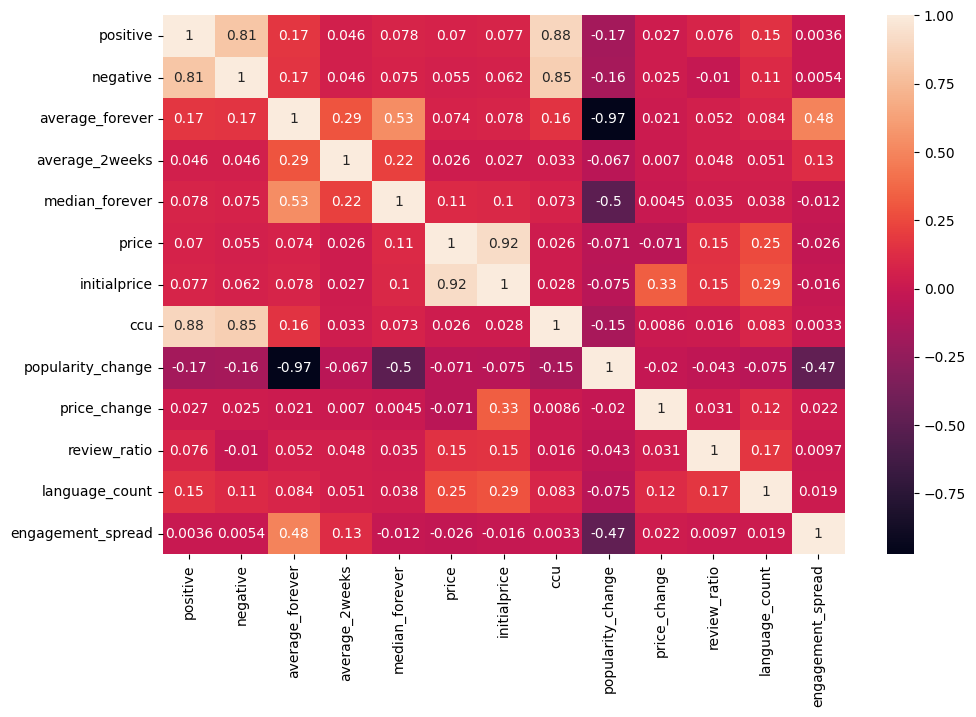

In [5]:
numerical = ['positive', 'negative', 'average_forever', 'average_2weeks', 
             'median_forever', 'price', 'initialprice', 'ccu',
             'popularity_change', 'price_change', 'review_ratio', 'language_count', 'engagement_spread']
    
plt.figure(figsize=(11, 7))
sns.heatmap(df[numerical].corr(), annot=True)
plt.show()

* The most noticible point on the heatmap is -0.97 correlation between avarage playtime forever and popularity change(avrage_2weeks - avrage_forever). It once again tell us that __big amount of games lost their popularity__.
* Logically, __games with more languages have a higher price__.
* Weird to see that __concurent users doesn't have a strong correlation with time spent on game__. Once again could be caused by dead games.

